In [1]:
!nvidia-smi

Thu Nov 23 06:06:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch
torch.__version__

'2.1.0+cu118'

In [3]:
import fastai
fastai.__version__

'2.7.13'

In [4]:
from google.colab import files
uploaded = files.upload()

Saving flowers (2).zip to flowers (2).zip


In [78]:
import zipfile
with zipfile.ZipFile("flowers (2).zip", "r") as zip_ref:
    zip_ref.extractall("flower_dataset")


In [79]:
import numpy as np
import pandas as pd

In [80]:
import os
dir = os.listdir('flower_dataset')
dir

['flowers']

In [81]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *


In [82]:
path = Path('/flower_dataset')

In [83]:
path

Path('/flower_dataset')

In [84]:
files = get_image_files('/content/flower_dataset/flowers')
len(files)

4323

(375, 500)


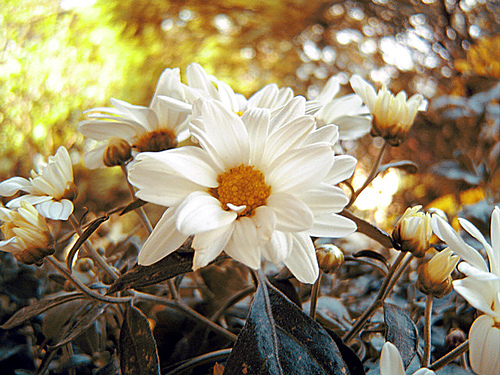

In [85]:
from PIL import Image
img = Image.open('/content/flower_dataset/flowers/daisy/54377391_15648e8d18.jpg')
print(img.shape)
display(img)

In [86]:
item_tfms=RandomResizedCrop(128, min_scale=0.3)

In [87]:
tfms = aug_transforms(mult=2.0)

In [88]:
path

Path('/flower_dataset')

In [89]:
path = Path('/content/flower_dataset/flowers')

In [90]:
path

Path('/content/flower_dataset/flowers')

In [91]:
Data = DataBlock( blocks=(ImageBlock, CategoryBlock), get_items=get_image_files,
splitter=RandomSplitter(valid_pct=0.2, seed=42), get_y=parent_label, item_tfms=item_tfms, batch_tfms=tfms)

In [92]:
dls = Data.dataloaders(path)

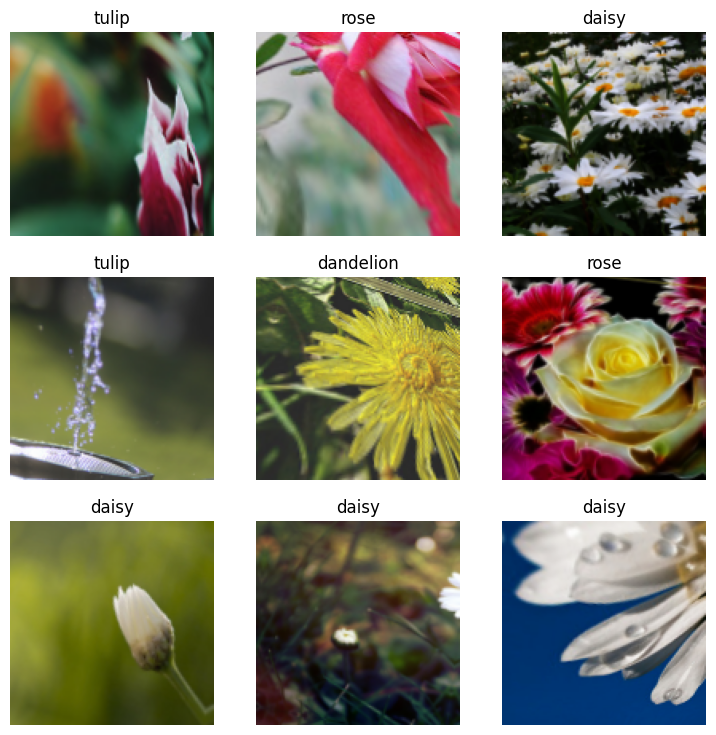

In [93]:
dls.show_batch()

In [94]:
learn = cnn_learner(dls, resnet34, metrics=[error_rate, accuracy])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [95]:
learn.summary()

Sequential (Input shape: 64 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 64 x 64   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 32 x 32   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

SuggestedLRs(valley=0.0005754399462603033)

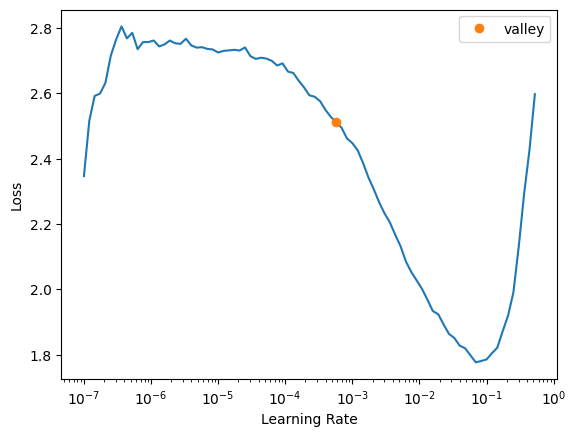

In [96]:
# learn.fine_tune(1)
learn.lr_find()

In [97]:
learn.fit_one_cycle(5, 0.0005)

In [98]:
interp = ClassificationInterpretation.from_learner(learn)

In [99]:
learn.predict(files[0])

('rose',
 tensor(2),
 tensor([4.9966e-04, 4.7214e-05, 9.9342e-01, 1.6123e-04, 5.8714e-03]))

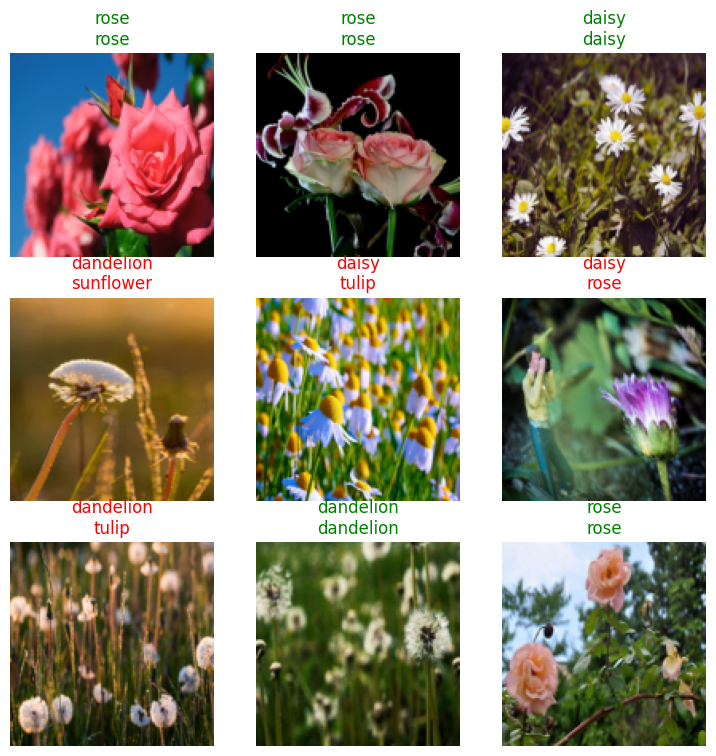

In [100]:
learn.show_results()

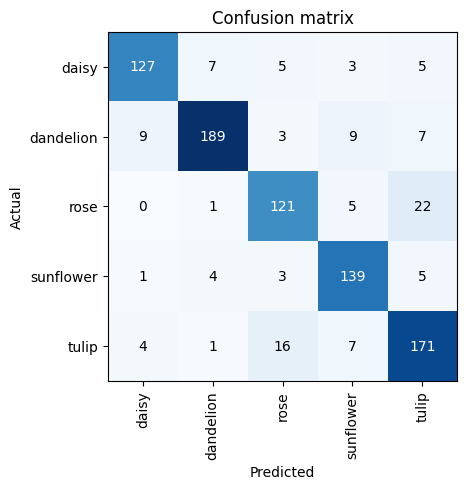

In [101]:
interp.plot_confusion_matrix()

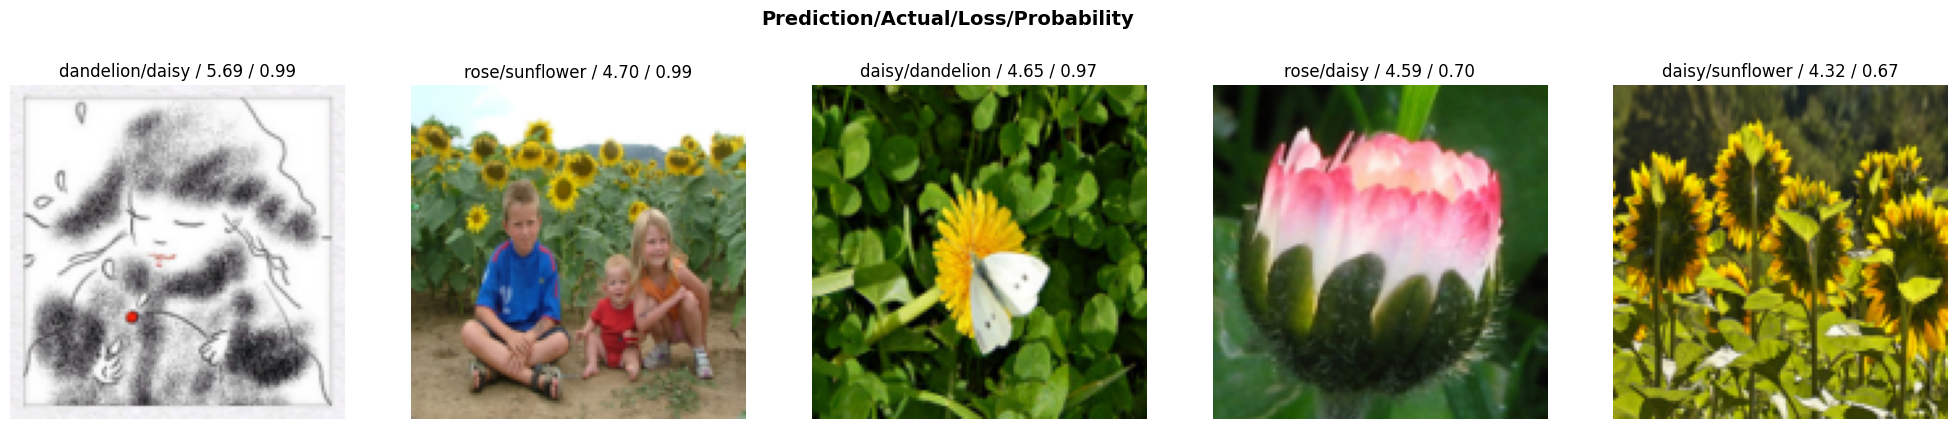

In [102]:
interp.plot_top_losses(5, nrows=1, figsize = (25,5))

Predict new image taken from internet

(768, 768)


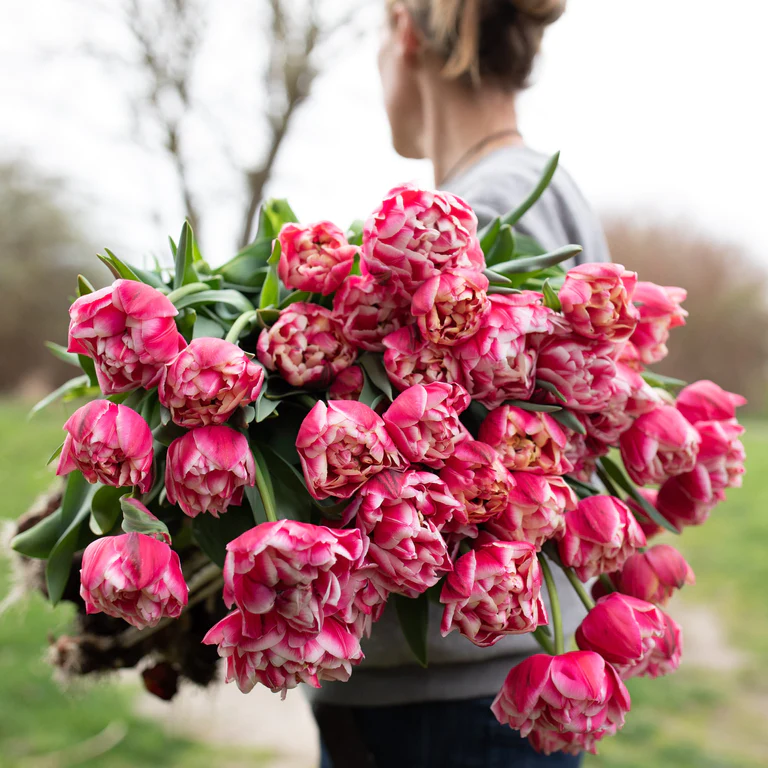

In [103]:
img = Image.open('/content/Tulips_Columbus_-4_768x.webp')
print(img.shape)
display(img)

In [104]:
learn.predict('/content/Tulips_Columbus_-4_768x.webp')

('tulip',
 tensor(4),
 tensor([1.9576e-05, 3.9627e-06, 3.2385e-01, 2.0980e-04, 6.7592e-01]))

True prediction